In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import plotly
from IPython.display import display


DECOUVERTE DU DATASET

In [2]:
df=pd.read_csv('Speed_Dating_Data.csv', encoding= 'unicode_escape')
pd.options.display.max_columns = None #afichage ed toutes les colonnes
display(df)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [4]:
df.shape

(8378, 195)

In [5]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

In [6]:
df.isnull().any()

iid         False
id           True
gender      False
idg         False
condtn      False
            ...  
attr5_3      True
sinc5_3      True
intel5_3     True
fun5_3       True
amb5_3       True
Length: 195, dtype: bool

In [7]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

SUPPRESSION DES DOUBLONS D'iid PAR VAGUE (wave) 

In [8]:
recherche_1 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1'] # suppression de : shar1_1 car non présent dans les autres recherche. Pas de comparatif possible
recherche_2 = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1']
recherche_3 = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']
recherche_4 = ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1']
recherche_5 = ['attr5_1', 'sinc5_1', 'int5_1', 'fun5_1', 'amb5_1']

profil = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
opinion = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']
dating = ['you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']
dataset = df[['iid', 'wave'] + recherche_1 + recherche_2  + recherche_3 + profil + evaluation + dating].drop_duplicates().copy()
dataset['gender'] = dataset['gender'].apply(lambda x : 'Female' if x == 0 else 'Male')
dataset.head()

,iid,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,1,1,15.0,20.0,20.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,6.0,8.0,8.0,8.0,7.0,Female,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN
10,2,1,45.0,5.0,25.0,20.0,0.0,65.0,0.0,10.0,25.0,0.0,7.0,5.0,8.0,10.0,3.0,Female,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN
20,3,1,35.0,10.0,35.0,10.0,10.0,50.0,0.0,20.0,30.0,0.0,8.0,9.0,9.0,8.0,8.0,Female,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,20.0,20.0,20.0,20.0,10.0,30.0,10.0,15.0,30.0,5.0,7.0,8.0,7.0,9.0,8.0,Female,23.0,Law,1.0,NaN,NaN,NaN,2.0,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN
40,5,1,20.0,5.0,25.0,25.0,10.0,50.0,10.0,10.0,20.0,5.0,6.0,3.0,10.0,6.0,8.0,Female,21.0,Law,1.0,NaN,NaN,NaN,2.0,8.0,1.0,Bowdoin College,"94,022","86,340.00",2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN


DECOUVERTE DES PARTICIPANTS ......

NOMBRE DE FEMMES DANS LE SPEED DATING

In [9]:
len(dataset[dataset.gender == 'Female'])

274

NOMBRE D'HOMMES DANS LE SPEED DATING

In [10]:
len(dataset[dataset.gender == 'Male'])

277

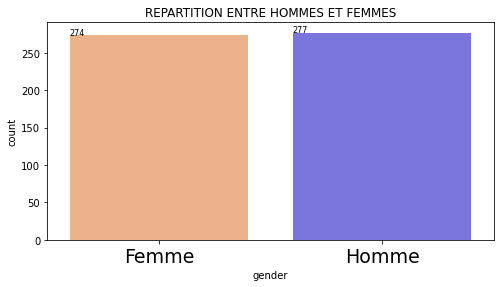

In [11]:
plt.figure(figsize=(8,4)) 
ax = sns.countplot(x = dataset["gender"], palette=['#FAAE7B',"#6b64ed"]); #choix de la couleur
ax.set_ylabel("count")
ax.set_title("REPARTITION ENTRE HOMMES ET FEMMES")
ax.set_xticklabels(['Femme', 'Homme'], fontsize=19, rotation='horizontal')

#affhichage des chiffres sur les plots
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

OBJECTIF DU SPPED DATING POUR LES HOMMES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


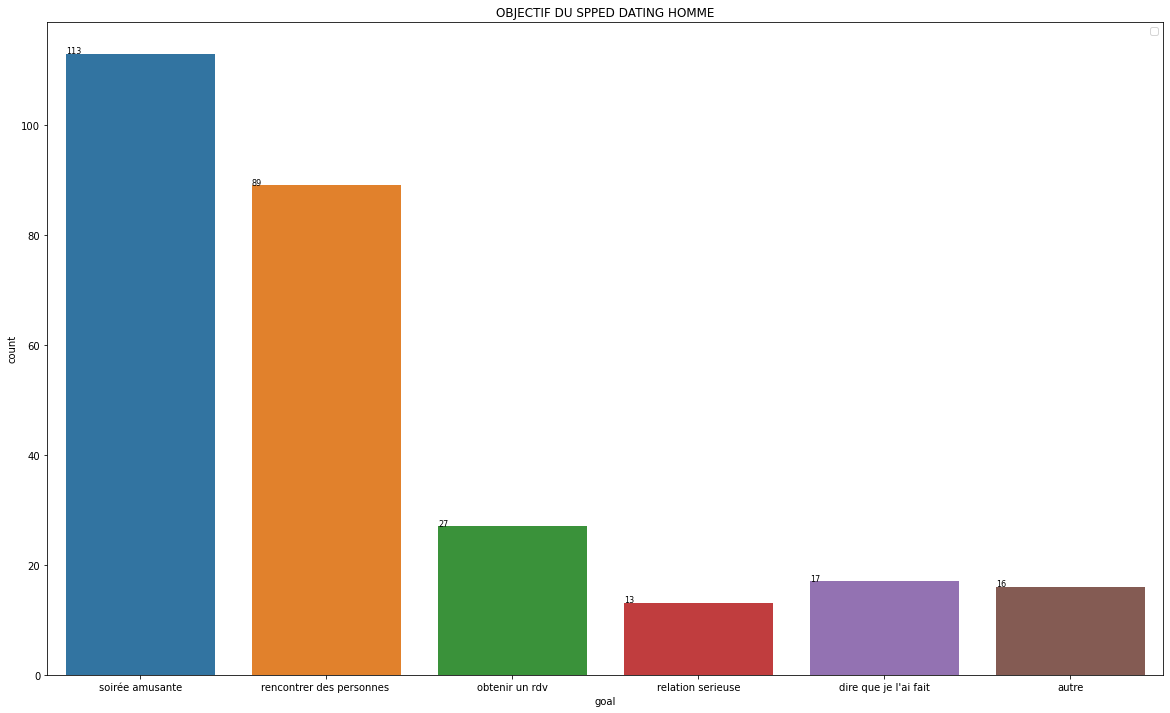

In [12]:
plt.figure(figsize=(20,12))
plt.legend()
ax = sns.countplot(x = dataset.goal[dataset.gender == 'Male']);
ax.set_ylabel("count")
ax.set_title("OBJECTIF DU SPPED DATING HOMME")
ax.set_xticklabels(['soirée amusante', 'rencontrer des personnes ', 'obtenir un rdv', 'relation serieuse', "dire que je l'ai fait", 'autre'], fontsize=10, rotation='horizontal')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

OBJECTIF DU SPEED DATING POUR LES FEMMES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


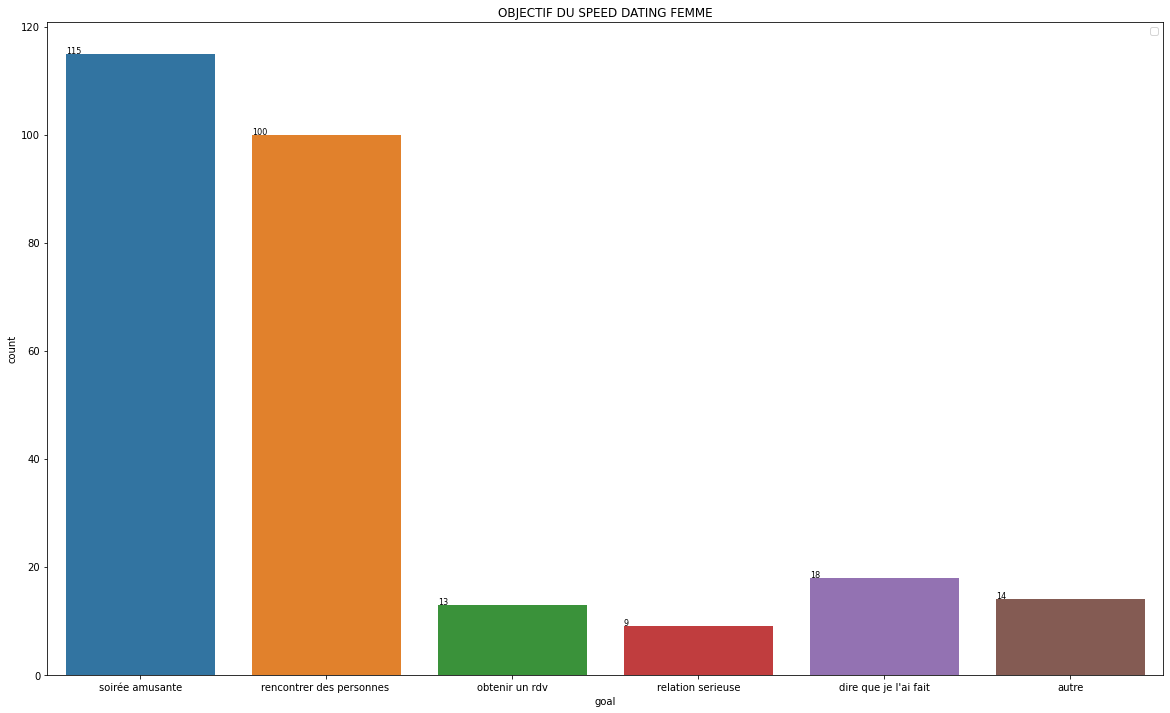

In [13]:
plt.figure(figsize=(20,12))
plt.legend()
ax = sns.countplot(x = dataset.goal[dataset.gender == 'Female']);
ax.set_ylabel("count")
ax.set_title("OBJECTIF DU SPEED DATING FEMME")
ax.set_xticklabels(['soirée amusante', 'rencontrer des personnes ', 'obtenir un rdv', 'relation serieuse', "dire que je l'ai fait", 'autre'], fontsize=10, rotation='horizontal')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

REMARQUE : 
LES HOMMES ET FEMMES ONT COMME PRINCIPAL OBJECTIF UNE SOIREE AMUSANTE ET LA RENCONTRE DE NOUVELLES PERSONNES. 
LA RECHERCHE DE RELATION EST SECONDAIRE.

ANALYSE DE L'AGE :

In [14]:
dataset[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

REPARTITION DES AGES

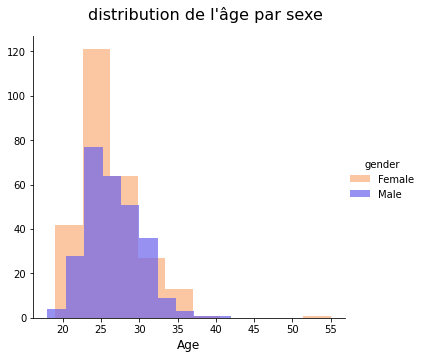

In [15]:
g = sns.FacetGrid(dataset, hue='gender', height = 5, palette=['#FAAE7B',"#6b64ed"])
g.map(plt.hist, 'age', alpha= 0.7, bins=10)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("distribution de l'âge par sexe", fontsize=16)
g.add_legend()

REPARTITION EMPLOIS HOMME FEMME (légende a ajouter)

In [16]:
####

In [17]:
dataset['carrer_c'] = dataset['career_c'].map({1.0 : 'Avocat', 2.0 : 'Chercheur', 3.0 : 'Psychologue',4.0:'Médecin/Médecine',5.0:'Ingénieur',6.0:'Arts créatifs/Divertissement',
7.0:'Banque/PDG/Entrepreneur/Admin', 8.0: 'Immobilier', 9.0: 'Affaires internationales/humanitaires', 10.0 : 'Indécis',11.0:'Travail social',12.0 :'Orthophonie',
13.0:'Politique',14.0:'Sports professionnels',15.0:'Autre',16.0 :'Journalisme',17.0:'Architecture'}, na_action=None)

<Figure size 432x288 with 0 Axes>

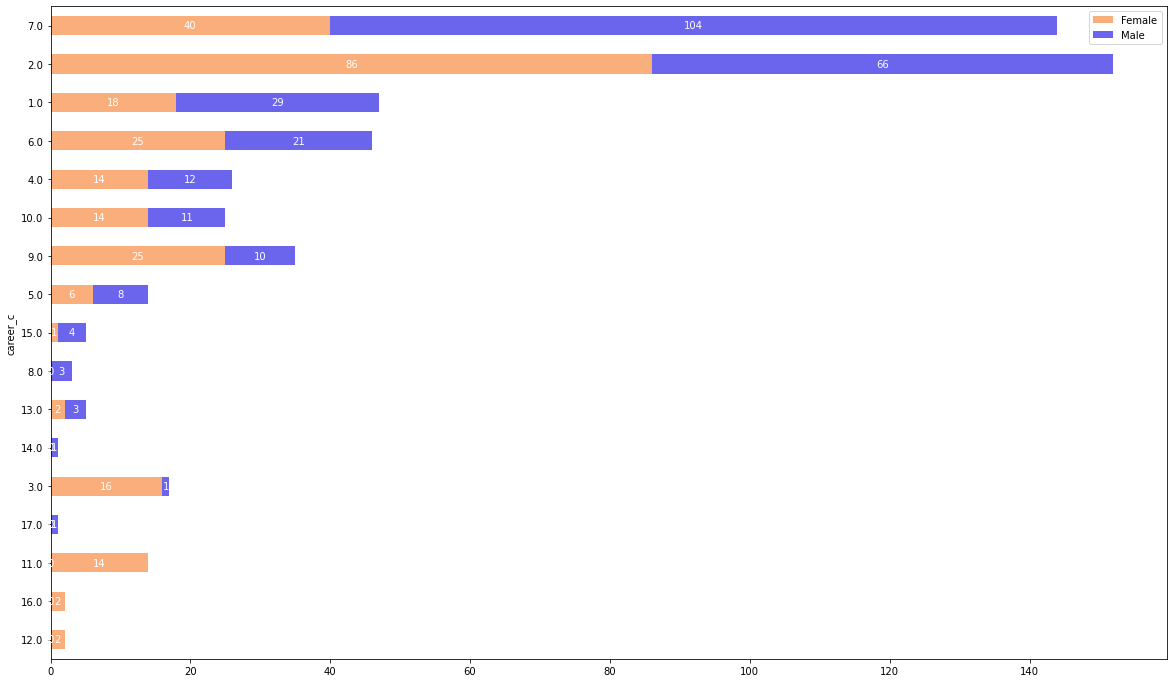

In [19]:
temp = dataset.groupby(by=['career_c', 'gender'])['gender'].agg('count').unstack().fillna(0)
fig = plt.figure()
ax = temp.sort_values(by='Male', ascending=True).plot(kind='barh', stacked=True, figsize=(20,12), orientation = "horizontal", color = ['#FAAE7B',"#6b64ed"])
for c in ax.containers:
    ax.bar_label(c, label_type='center', color = 'white' )
plt.legend()

REGARDONS LA REPARTITION DES ORIGINES ETHNIQUES PAR HOMME OU FEMME (légende à ajouter)

In [49]:
#Ajout d'une colonne new_race pour améliorer la compréhention du graph
dataset['new_race'] = dataset['race'].map({1.0: 'Afrique', 2.0: 'Caucasien', 3.0: 'Hispanique' , 4.0: 'Asie', 5.0: 'Natif américain', 6.0: 'Autre'}, na_action=None)

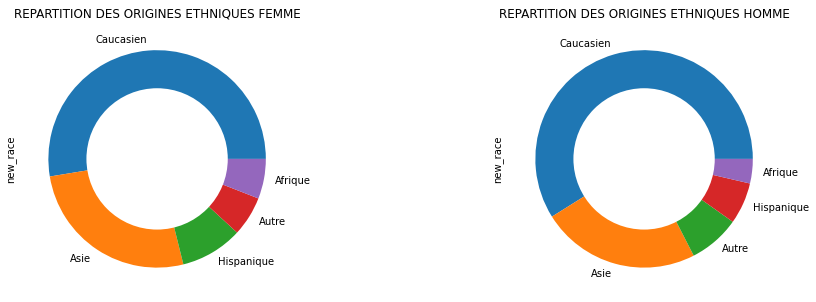

In [50]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
dataset[dataset.gender =='Female'].new_race.value_counts().plot(kind='pie')
plt.title('REPARTITION DES ORIGINES ETHNIQUES FEMME')
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(1,2,2)
dataset[dataset.gender =='Male'].new_race.value_counts().plot(kind='pie')
plt.title('REPARTITION DES ORIGINES ETHNIQUES HOMME')
centre_circle = plt.Circle((0,0),0.65,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

REMARQUE : SURREPRESENTATION DES "CAUCASIENS" PUIS ORIGINE ETHNIQUE ASIATIQUE

HOBBIES PAR SEXE

In [ ]:
hobbies = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']

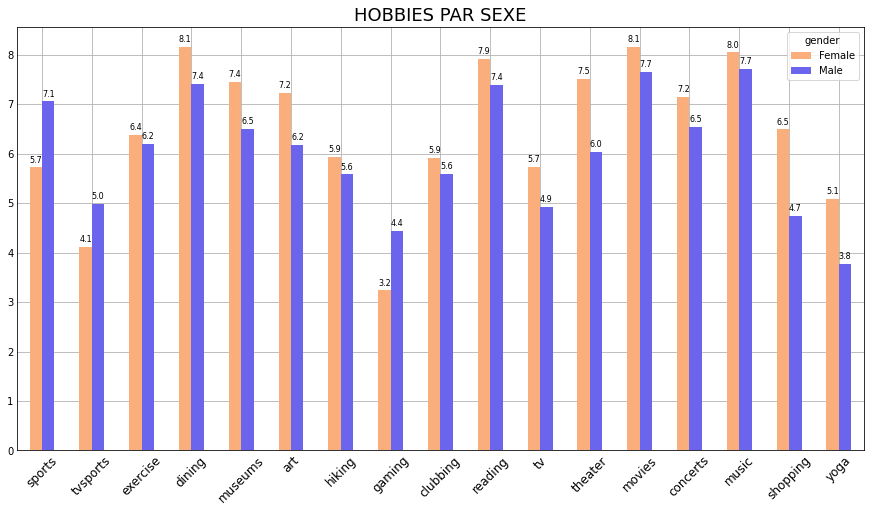

In [98]:
dataset_hobbies = dataset[['gender']+ hobbies].groupby(['gender']).mean().stack().unstack(0)
ax = dataset_hobbies.plot(kind='bar', figsize=(12,6), color = ['#FAAE7B',"#6b64ed"])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('HOBBIES PAR SEXE', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

QUESTIONS POSE AUX PARTICIPANTS LORS DU SPEED DATING :

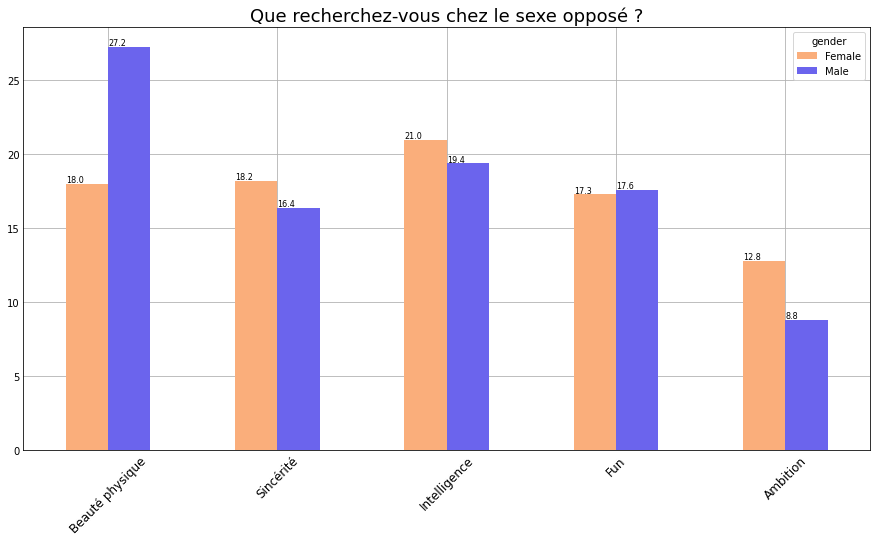

In [97]:
dataset_recherche_1 = dataset[['gender']+ recherche_1].groupby(['gender']).mean().stack().unstack(0)
ax = dataset_recherche_1.plot(kind='bar', figsize=(12,6),color = ['#FAAE7B',"#6b64ed"])
ax.set_xticklabels(["Beauté physique", "Sincérité", "Intelligence", "Fun", "Ambition"], fontsize=12, rotation=45)
ax.set_title('Que recherchez-vous chez le sexe opposé ?', fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)
                   

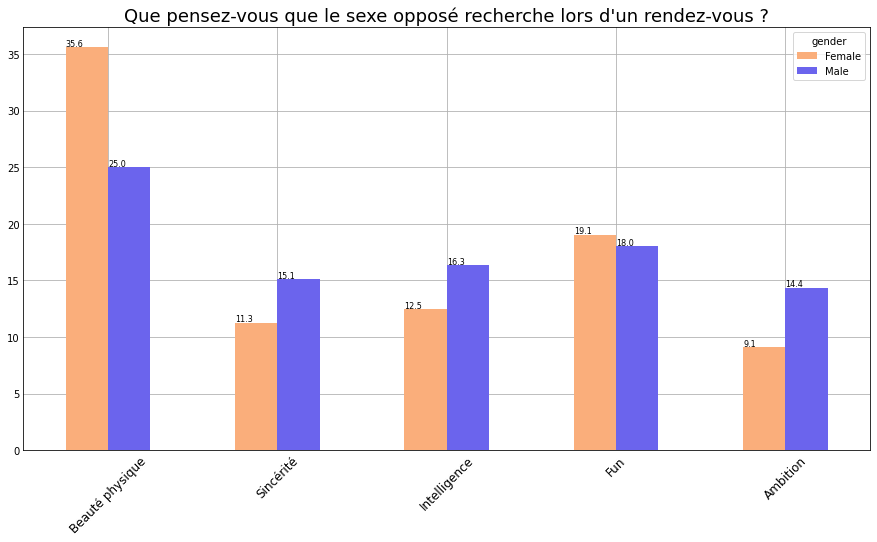

In [96]:
dataset_recherche_2 = dataset[['gender']+ recherche_2].groupby(['gender']).mean().stack().unstack(0)
ax = dataset_recherche_2.plot(kind='bar', figsize=(12,6),color = ['#FAAE7B',"#6b64ed"])
ax.set_xticklabels(["Beauté physique", "Sincérité", "Intelligence", "Fun", "Ambition"], fontsize=12, rotation=45)

ax.set_title("Que pensez-vous que le sexe opposé recherche lors d'un rendez-vous ?", fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

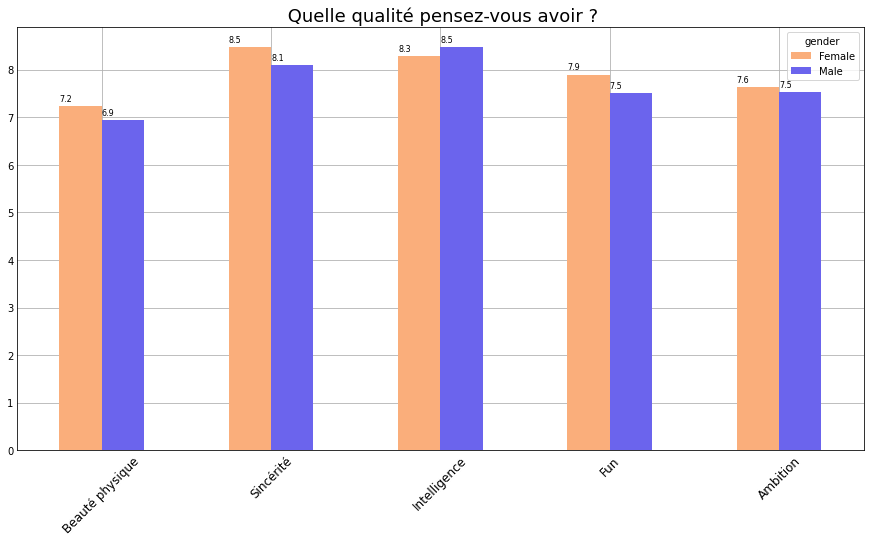

In [94]:
dataset_recherche_3 = dataset[['gender']+ recherche_3].groupby(['gender']).mean().stack().unstack(0)
ax = dataset_recherche_3.plot(kind='bar', figsize=(12,6), color = ['#FAAE7B',"#6b64ed"])
ax.set_xticklabels(["Beauté physique", "Sincérité", "Intelligence", "Fun", "Ambition"], fontsize=12, rotation=45)

ax.set_title(" Quelle qualité pensez-vous avoir ?", fontsize=18)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.10, \
            str(round((i.get_height()), 1)), fontsize=8)

In [280]:
!pip install phik

     |████████████████████████████████| 709 kB 10.3 MB/s            


In [209]:
small = df[[ 'gender', 'dec','race', 'goal','go_out', 'career_c', 'match','age']]

In [224]:
#Renomme les colonnes pour la compréhension
small.rename(columns={'gender': 'sexe', 'dec' : 'decsion', 'race' : 'origine ethnique', 'goal' : 'but recherché', 'go_out' : 'Sort souvent', 'carrer_c' : 'carrière'}, inplace=True)


CONCLUSION : MATRICE DE CORRELATIONS

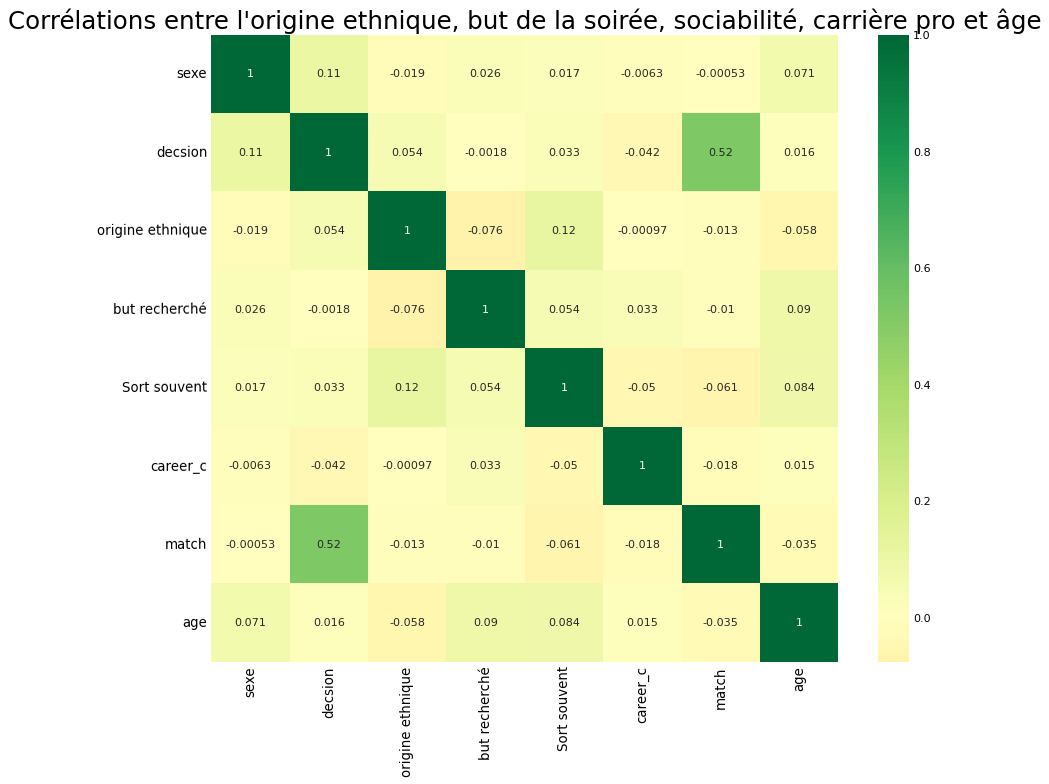

In [212]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(small.corr(), xticklabels=small.corr().columns, yticklabels=small.corr().columns, cmap='RdYlGn', center=0, annot=True, )

# Decorations
plt.title("Corrélations entre l'origine ethnique, but de la soirée, sociabilité, carrière pro et âge", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12,rotation=0.3)
plt.show()

Il n'y a aucune corrélation entre ces différents items et la prise d'un deuxième RDV

In [216]:
small_2 = df[['gender', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'match','dec']]

In [223]:
#Renomme les colonnes pour la compréhension
small_2.rename(columns={'gender': 'sexe', 'dining' : 'restaurants', 'music': 'musique', 'museums' : 'musées', 'hiking' : 'randonnée', 'reading' : 'lecture', 'theater' : 'théatre', 'movies' : 'films', 'dec' : 'decsion' }, inplace=True)


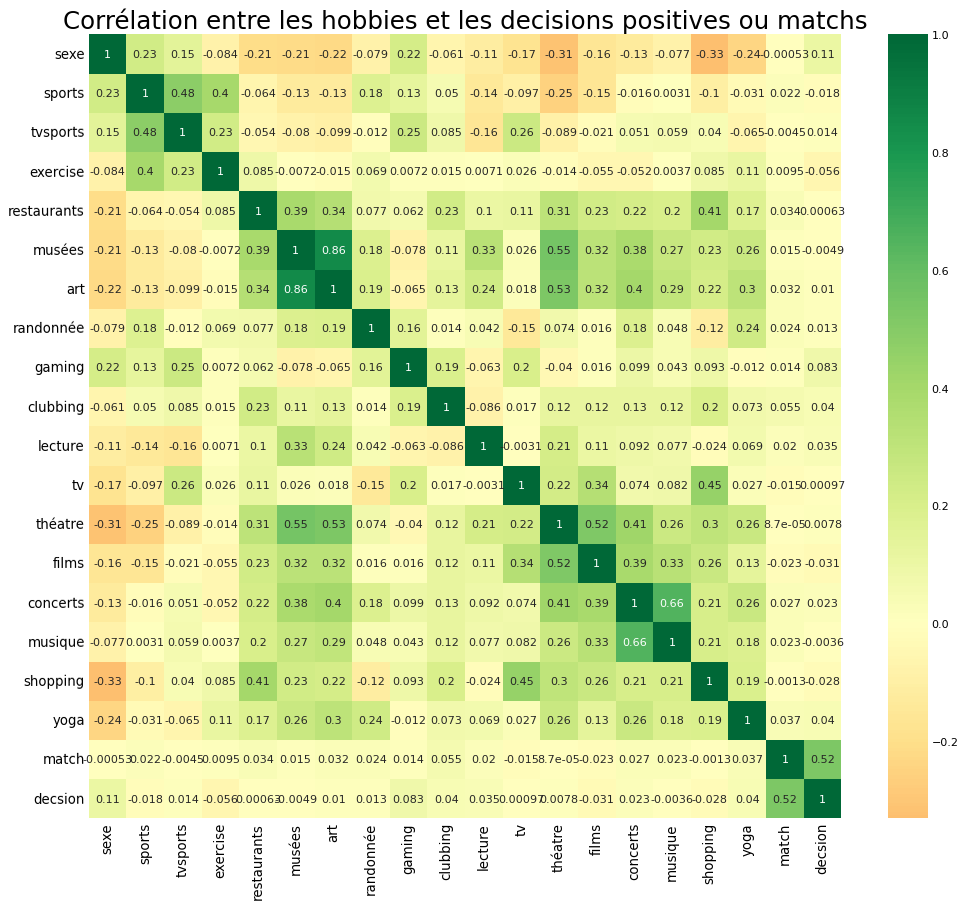

In [222]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(small_2.corr(), xticklabels=small_2.corr().columns, yticklabels=small_2.corr().columns, cmap='RdYlGn', center=0, annot=True, )

# Decorations
plt.title('Corrélation entre les hobbies et les decisions positives ou matchs', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12,rotation=0.3)
plt.show()

il n'y a aucune corrélation entre les hobbies et une decision positive

In [233]:
small_3 = df[['attr3_1', 'sinc3_1','fun3_1', 'amb3_1', 'dec', 'match']]

In [234]:
small_3.rename(columns={"attr3_1" : "Beauté physique", "sinc3_1" : "Sincérité", "fun3_1" : "Fun", 'dec' : 'decsion', 'amb3_1' : 'Ambition'}, inplace=True)

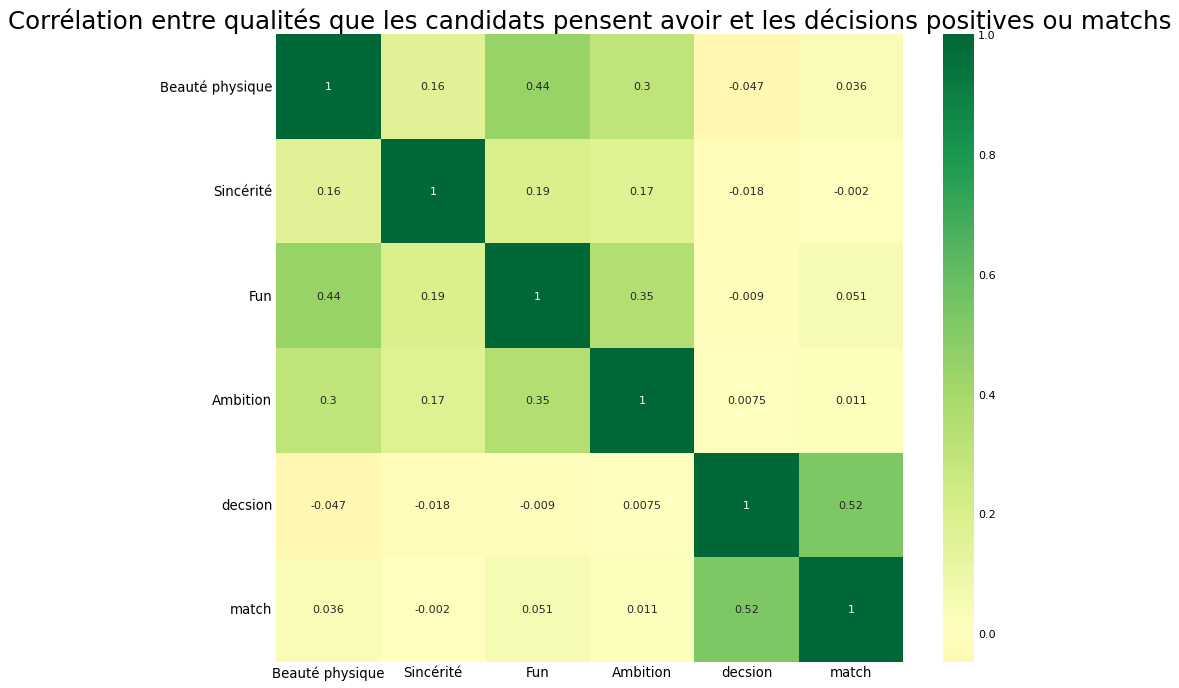

In [235]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(small_3.corr(), xticklabels=small_3.corr().columns, yticklabels=small_3.corr().columns, cmap='RdYlGn', center=0, annot=True, )

# Decorations
plt.title('Corrélation entre qualités que les candidats pensent avoir et les décisions positives ou matchs', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12,rotation=0.3)
plt.show()

Conclusion : 
Il n'y a rien d'évident !

Aucune corrélation visible qui valide une décision positive et/ou match.
Visiblement, les participants souhaitaient passer une soirée amusante et rencontrer du monde sans pour autant obtenir un  second rendez-vous.